In [10]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 10)

In [11]:
DATA_DIR = 'total data\KT DATA'
data_files = [os.path.join(DATA_DIR, filename) for filename in os.listdir(DATA_DIR)]
list_df = []
for filename in data_files:
    print(filename)
    list_df.append(pd.read_csv(filename))

df = pd.concat(list_df, sort = False)
df = df.reset_index(drop = True)    
df

total data\KT DATA\01_0745_0840.csv
total data\KT DATA\01_0800_1000.csv
total data\KT DATA\01_0935_1130.csv
total data\KT DATA\02_0840_0920.csv
total data\KT DATA\02_1000_1200.csv
total data\KT DATA\02_1130_1300.csv
total data\KT DATA\03_0920_1120.csv
total data\KT DATA\03_1200_1400.csv
total data\KT DATA\03_1300_1500.csv
total data\KT DATA\04_1120_1320.csv
total data\KT DATA\04_1400_1600.csv
total data\KT DATA\04_1500_1700.csv
total data\KT DATA\05_1320_1520.csv
total data\KT DATA\05_1700_1850.csv
total data\KT DATA\06_1520_1720.csv
total data\KT DATA\07_1720_1920.csv
total data\KT DATA\08_1920_2120.csv
total data\KT DATA\09_2120_2320.csv


,id,_NAME,_NUMERICID,_VALUE,_TIMESTAMP,_QUALITY
0,1,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,11854,2020-04-05 07:51:57.817,192
1,2,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,11854,2020-04-05 07:51:57.817,192
2,3,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,11855,2020-04-05 07:51:57.830,192
3,4,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,11854,2020-04-05 07:51:57.817,192
4,5,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,11854,2020-04-05 07:51:57.817,192
...,...,...,...,...,...,...
8684525,145996,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,65275,2020-04-05 22:41:56.043,192
8684526,145997,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,65275,2020-04-05 22:41:56.043,192
8684527,145998,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,65275,2020-04-05 22:41:56.043,192
8684528,145999,chRX_KT_svr.Device1.chTxCntSimulatorKT.TxKT_LT...,0,65275,2020-04-05 22:41:56.043,192


In [12]:
df = df.drop(['_QUALITY', '_NUMERICID', 'id'], axis=1)
# df['_NAME'] = df['_NAME'].apply(lambda x: x.split('Group1.')[-1]) #SKT
df['_NAME'] = df['_NAME'].apply(lambda x: x.split('LTE.')[-1]) #KT
df = df.sort_values(by = '_NAME', ascending = True)
from datetime import datetime
df['_TIMESTAMP'] = pd.to_datetime(df['_TIMESTAMP'].astype('str'))
df['_VALUE'] = df['_VALUE'].astype('str').astype('int64')
df.head()

,_NAME,_VALUE,_TIMESTAMP
0,Tag1,11854,2020-04-05 07:51:57.817
5516013,Tag1,19451,2020-04-04 15:46:21.623
309964,Tag1,33845,2020-04-06 08:10:11.207
5515913,Tag1,19450,2020-04-04 15:46:20.623
5515813,Tag1,19449,2020-04-04 15:46:19.623


In [13]:
df = df[df['_NAME'].isin(['Tag1'])]
df = df.sort_values(by = '_TIMESTAMP', ascending = True)
df = df.reset_index()
df = df.drop(['index'], axis=1)
df

,_NAME,_VALUE,_TIMESTAMP
0,Tag1,62711,2020-04-04 09:35:19.563
1,Tag1,62712,2020-04-04 09:35:20.563
2,Tag1,62713,2020-04-04 09:35:21.563
3,Tag1,62714,2020-04-04 09:35:22.563
4,Tag1,62715,2020-04-04 09:35:23.563
...,...,...,...
86839,Tag1,58155,2020-04-06 14:55:09.300
86840,Tag1,58156,2020-04-06 14:55:10.300
86841,Tag1,58157,2020-04-06 14:55:11.300
86842,Tag1,58158,2020-04-06 14:55:12.300


In [14]:
for col in df.columns:
    print(col, ':', sum(df[col].isna()), '/', len(df))

_NAME : 0 / 86844
_VALUE : 0 / 86844
_TIMESTAMP : 0 / 86844


In [15]:
for col in df.columns:
    print(col, ':', len(df[col].value_counts()), '/', len(df))

_NAME : 1 / 86844
_VALUE : 57633 / 86844
_TIMESTAMP : 86844 / 86844


In [16]:
past = 0
diff_list = []
chFile_list = []

for i in df.index:
    row_val = df.loc[i, '_VALUE']
    if row_val > past:
        val = row_val - past
        diff_list.append(val)
        past = row_val
        if val > 60:
            chFile_list.append(i)
    else:
        val = 0
        diff_list.append(val)
        past = row_val

df["diff-value"] = diff_list
# df = df.drop(0,0)

for k in chFile_list:
    df = df.drop(k, 0)
    
    
df

,_NAME,_VALUE,_TIMESTAMP,diff-value
1,Tag1,62712,2020-04-04 09:35:20.563,1
2,Tag1,62713,2020-04-04 09:35:21.563,1
3,Tag1,62714,2020-04-04 09:35:22.563,1
4,Tag1,62715,2020-04-04 09:35:23.563,1
5,Tag1,62716,2020-04-04 09:35:24.563,1
...,...,...,...,...
86839,Tag1,58155,2020-04-06 14:55:09.300,1
86840,Tag1,58156,2020-04-06 14:55:10.300,1
86841,Tag1,58157,2020-04-06 14:55:11.300,1
86842,Tag1,58158,2020-04-06 14:55:12.300,1


Text(0.5, 1.02, 'bar chart')

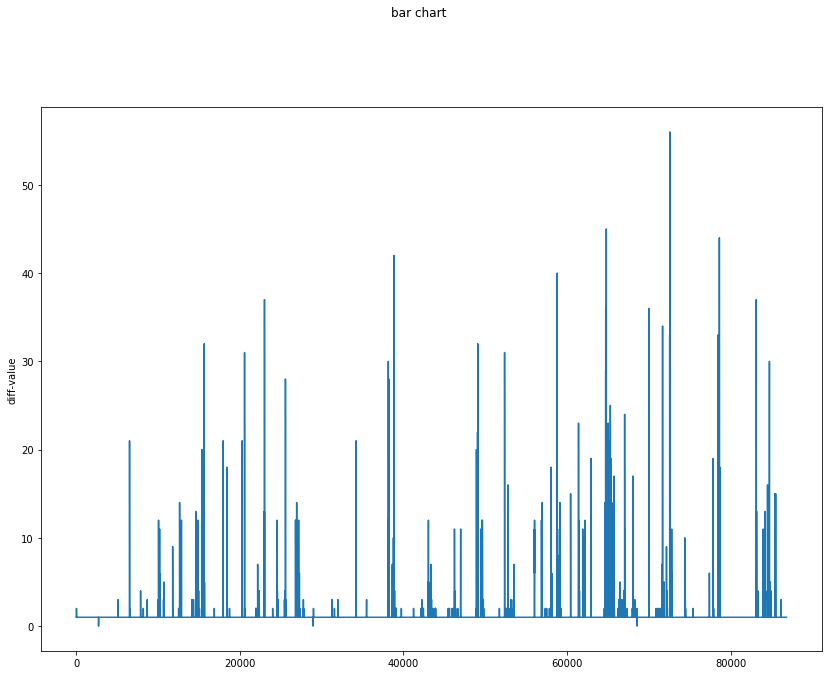

In [17]:
g = sns.lineplot(x = df.index, y = df["diff-value"], data = df)
plt.suptitle("bar chart", y=1.02)

In [32]:
sample_df = pd.DataFrame(columns = ("delay", "diff-value"))
sample_df['diff-value'] = df['diff-value'].value_counts()
sample_df['delay'] = sample_df.index
sample_df['delay-time'] = sample_df['delay'] * sample_df['diff-value']
sample_df.head()

,delay,diff-value,delay-time
1,1,86065,86065
2,2,416,832
3,3,84,252
4,4,40,160
5,5,31,155


In [33]:
# sample_df['diff-value'][1] 
percent = sample_df['delay-time'][1] / sample_df['delay-time'].sum() * 100
print ("통신 연결성 = " + percent.astype('str') + " %")

통신 연결성 = 95.52800408462274 %


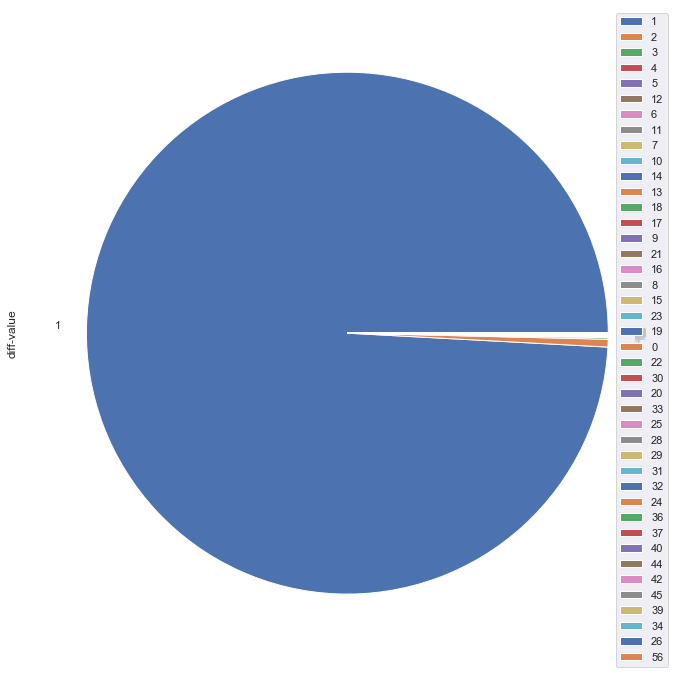

In [34]:
plot = sample_df.plot.pie(y='diff-value', figsize=(12, 12))

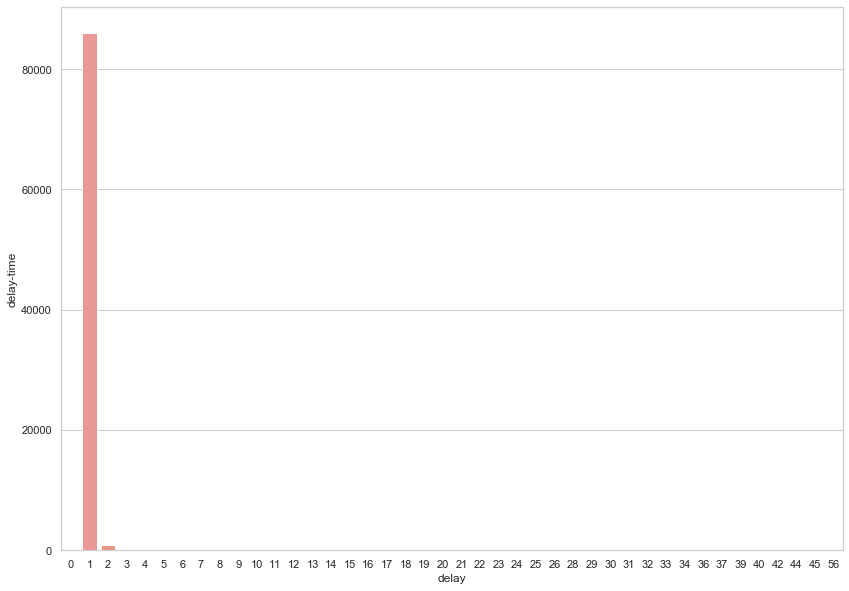

In [36]:

sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="delay", y="delay-time", data=sample_df)

Text(0.5, 1.02, 'LIne Plot')

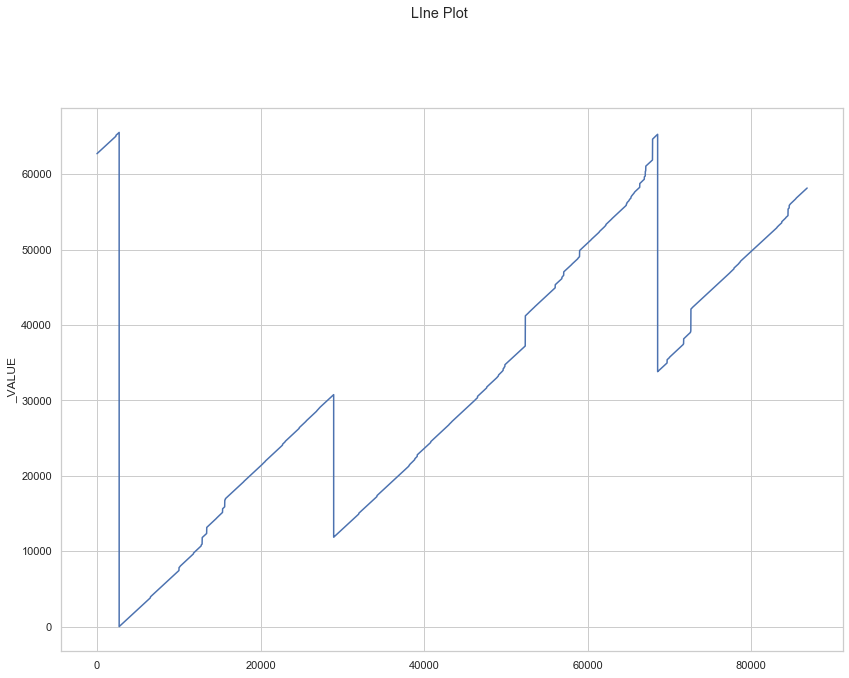

In [22]:
g = sns.lineplot(x = df.index, y = df["_VALUE"], data = df)
plt.suptitle("LIne Plot", y=1.02)

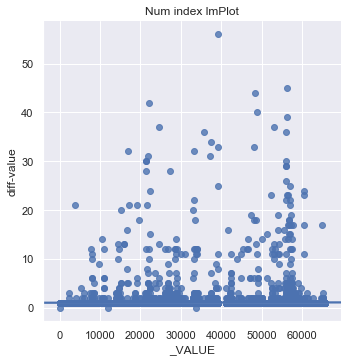

In [23]:
sns.set_style("darkgrid")
sns.lmplot(x="_VALUE", y = "diff-value", data = df)
plt.title("Num index lmPlot")
plt.show()

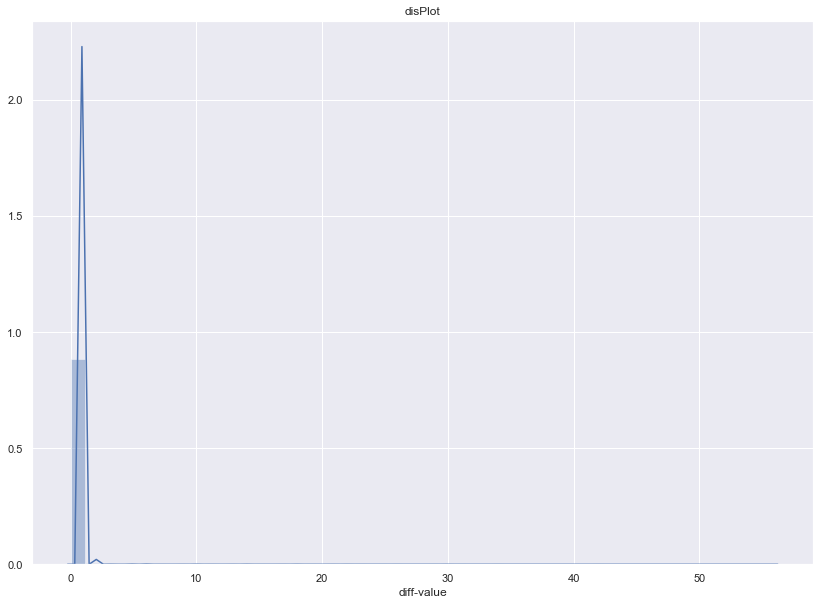

In [24]:
sns.distplot(df["diff-value"])
plt.title("disPlot")
plt.show()

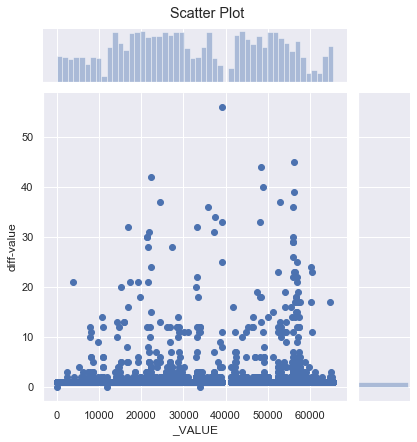

In [25]:
sns.jointplot(x="_VALUE", y="diff-value", data=df)
plt.suptitle("Scatter Plot", y=1.02)
plt.show()

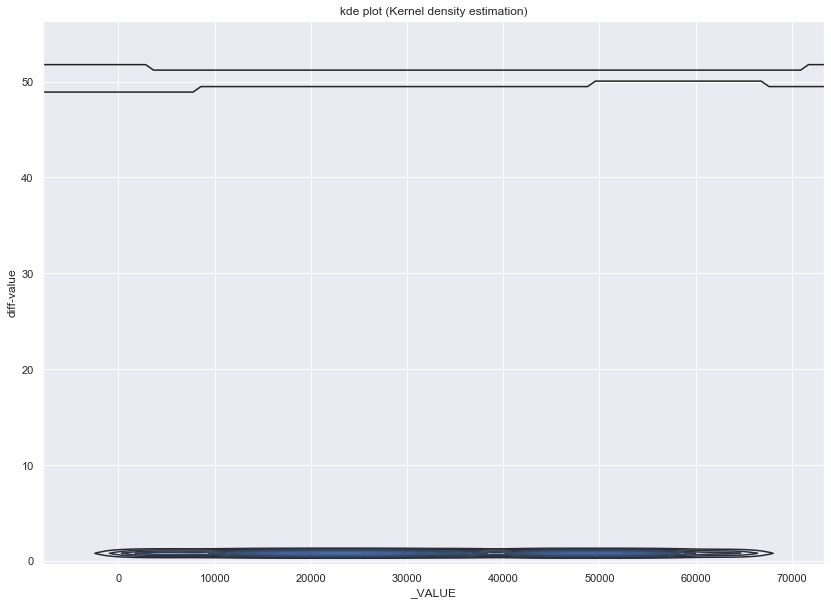

In [26]:
sns.kdeplot(df["_VALUE"], df["diff-value"])
plt.title("kde plot (Kernel density estimation)")
plt.show()